In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [2]:
house_df.shape

(1460, 81)

In [3]:
#target is saleprice

In [4]:
house_df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage       259
lotarea             0
street              0
alley            1369
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype          8
masvnrarea          8
exterqual           0
extercond           0
foundation          0
                 ... 
bedroomabvgr        0
kitchenabvgr        0
kitchenqual         0
totrmsabvgrd        0
functional          0
fireplaces          0
fireplacequ       690
garagetype         81
garageyrblt        81
garagefinish       81
garagecars          0
garagearea          0
garagequal         81
garagecond         81
paveddrive

In [5]:
#data cleaning on continuous variables 

In [6]:
#will drop variables: poolqc, fence, miscfeature, alley, because they're almost all null 

In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [8]:
#fill in missing values: Lotfrontage (float), bsmtcond and bsmtqual (object)
#fireplacequ (object), garagetype, garagecond, garagefinish, garagequal(object),
#garageyrblt (float)

I've chosen to fill in the missing values because by doing so it keeps all data points in place. Another option for dealing with missing values would be dropping the rows with missing values. Had I taken the latter approach I would loose a significant amount of data, therefore losing statisitcal power. 

In [9]:
#dropping variables poolqc, fence, miscfeature, alley
house_df.drop(['poolqc'],axis=1,inplace=True)
house_df.drop(['fence'], axis=1,inplace=True)
house_df.drop(['miscfeature'], axis=1,inplace=True)
house_df.drop(['alley'], axis=1,inplace=True)

# or house_df.drop(['poolqc','fence','miscfeature','alley'], axis=1,inplace=True)

In [10]:
house_df['lotfrontage']=house_df['lotfrontage'].fillna(house_df['lotfrontage'].mean())

In [11]:
house_df['bsmtcond']=house_df['bsmtcond'].fillna(house_df['bsmtcond'].mode()[0])
house_df['bsmtqual']=house_df['bsmtqual'].fillna(house_df['bsmtqual'].mode()[0])

In [12]:
house_df['fireplacequ']=house_df['fireplacequ'].fillna(house_df['fireplacequ'].mode()[0])

In [13]:
house_df['garagecond']=house_df['garagecond'].fillna(house_df['garagecond'].mode()[0])
house_df['garagequal']=house_df['garagequal'].fillna(house_df['garagequal'].mode()[0])
house_df['garagefinish']=house_df['garagefinish'].fillna(house_df['garagefinish'].mode()[0])
house_df['garagetype']=house_df['garagetype'].fillna(house_df['garagetype'].mode()[0])
house_df['garageyrblt']=house_df['garageyrblt'].fillna(house_df['garageyrblt'].mode()[0])


In [14]:
house_df.shape

(1460, 77)

In [15]:
house_df.isnull().sum()*100/house_df.isnull().count()

id               0.000000
mssubclass       0.000000
mszoning         0.000000
lotfrontage      0.000000
lotarea          0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
overallqual      0.000000
overallcond      0.000000
yearbuilt        0.000000
yearremodadd     0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
masvnrarea       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         0.000000
                   ...   
bsmthalfbath     0.000000
fullbath         0.000000
halfbath         0.000000
bedroomabvgr     0.000000
kitchenabvgr     0.000000
kitchenqual      0.000000
totrmsabvgrd     0.000000
functional  

In [16]:
house_df['masvnrtype']=house_df['masvnrtype'].fillna(house_df['masvnrtype'].mode()[0])
house_df['masvnrarea']=house_df['masvnrarea'].fillna(house_df['masvnrarea'].mean())

In [17]:
house_df.isnull().sum()*100/house_df.isnull().count()

id               0.0
mssubclass       0.0
mszoning         0.0
lotfrontage      0.0
lotarea          0.0
street           0.0
lotshape         0.0
landcontour      0.0
utilities        0.0
lotconfig        0.0
landslope        0.0
neighborhood     0.0
condition1       0.0
condition2       0.0
bldgtype         0.0
housestyle       0.0
overallqual      0.0
overallcond      0.0
yearbuilt        0.0
yearremodadd     0.0
roofstyle        0.0
roofmatl         0.0
exterior1st      0.0
exterior2nd      0.0
masvnrtype       0.0
masvnrarea       0.0
exterqual        0.0
extercond        0.0
foundation       0.0
bsmtqual         0.0
                ... 
bsmthalfbath     0.0
fullbath         0.0
halfbath         0.0
bedroomabvgr     0.0
kitchenabvgr     0.0
kitchenqual      0.0
totrmsabvgrd     0.0
functional       0.0
fireplaces       0.0
fireplacequ      0.0
garagetype       0.0
garageyrblt      0.0
garagefinish     0.0
garagecars       0.0
garagearea       0.0
garagequal       0.0
garagecond   

In [30]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1460 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non

In [18]:
#outliers 

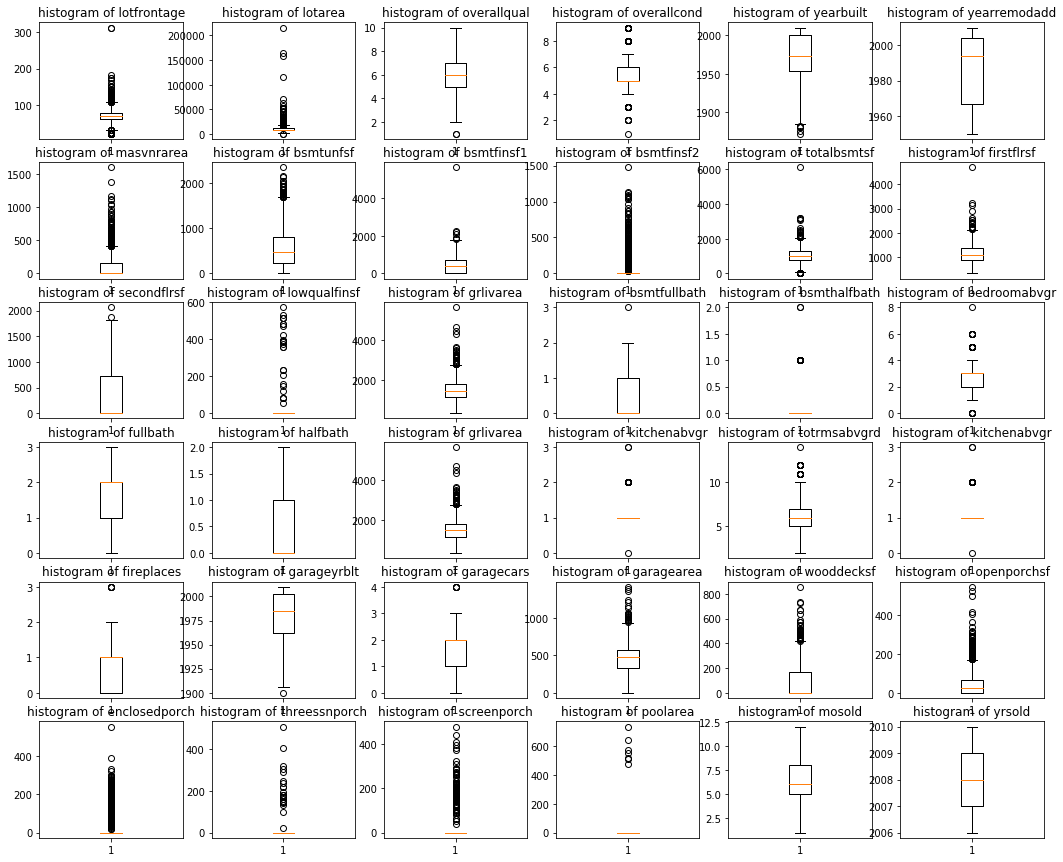

In [32]:
plt.figure(figsize=(18,15))

plt.subplot(6, 6, 1)
plt.boxplot(house_df["lotfrontage"])
plt.title("histogram of lotfrontage")

plt.subplot(6, 6, 2)
plt.boxplot(house_df["lotarea"])
plt.title("histogram of lotarea")

plt.subplot(6, 6, 3)
plt.boxplot(house_df["overallqual"])
plt.title("histogram of overallqual")

plt.subplot(6, 6, 4)
plt.boxplot(house_df["overallcond"])
plt.title("histogram of overallcond")

plt.subplot(6, 6, 5)
plt.boxplot(house_df["yearbuilt"])
plt.title("histogram of yearbuilt")

plt.subplot(6, 6, 6)
plt.boxplot(house_df["yearremodadd"])
plt.title("histogram of yearremodadd")

plt.subplot(6, 6, 7)
plt.boxplot(house_df["masvnrarea"])
plt.title("histogram of masvnrarea")

plt.subplot(6, 6, 8)
plt.boxplot(house_df["bsmtunfsf"])
plt.title("histogram of bsmtunfsf")

plt.subplot(6, 6, 9)
plt.boxplot(house_df["bsmtfinsf1"])
plt.title("histogram of bsmtfinsf1")

plt.subplot(6, 6, 10)
plt.boxplot(house_df["bsmtfinsf2"])
plt.title("histogram of bsmtfinsf2")

plt.subplot(6, 6, 11)
plt.boxplot(house_df["totalbsmtsf"])
plt.title("histogram of totalbsmtsf")

plt.subplot(6, 6, 12)
plt.boxplot(house_df["firstflrsf"])
plt.title("histogram of firstflrsf")

plt.subplot(6, 6, 13)
plt.boxplot(house_df["secondflrsf"])
plt.title("histogram of secondflrsf")

plt.subplot(6, 6, 14)
plt.boxplot(house_df["lowqualfinsf"])
plt.title("histogram of lowqualfinsf")

plt.subplot(6, 6, 15)
plt.boxplot(house_df["grlivarea"])
plt.title("histogram of grlivarea")

plt.subplot(6, 6, 16)
plt.boxplot(house_df["bsmtfullbath"])
plt.title("histogram of bsmtfullbath")

plt.subplot(6, 6, 17)
plt.boxplot(house_df["bsmthalfbath"])
plt.title("histogram of bsmthalfbath")

plt.subplot(6, 6, 18)
plt.boxplot(house_df["bedroomabvgr"])
plt.title("histogram of bedroomabvgr")

plt.subplot(6, 6, 19)
plt.boxplot(house_df["fullbath"])
plt.title("histogram of fullbath")

plt.subplot(6, 6, 20)
plt.boxplot(house_df["halfbath"])
plt.title("histogram of halfbath")

plt.subplot(6, 6, 21)
plt.boxplot(house_df["grlivarea"])
plt.title("histogram of grlivarea")

plt.subplot(6, 6, 22)
plt.boxplot(house_df["kitchenabvgr"])
plt.title("histogram of kitchenabvgr")

plt.subplot(6, 6, 23)
plt.boxplot(house_df["totrmsabvgrd"])
plt.title("histogram of totrmsabvgrd")

plt.subplot(6, 6, 24)
plt.boxplot(house_df["kitchenabvgr"])
plt.title("histogram of kitchenabvgr")

plt.subplot(6, 6, 25)
plt.boxplot(house_df["fireplaces"])
plt.title("histogram of fireplaces")

plt.subplot(6, 6, 26)
plt.boxplot(house_df["garageyrblt"])
plt.title("histogram of garageyrblt")

plt.subplot(6, 6, 27)
plt.boxplot(house_df["garagecars"])
plt.title("histogram of garagecars")

plt.subplot(6, 6, 28)
plt.boxplot(house_df["garagearea"])
plt.title("histogram of garagearea")

plt.subplot(6, 6, 29)
plt.boxplot(house_df["wooddecksf"])
plt.title("histogram of wooddecksf")

plt.subplot(6, 6, 30)
plt.boxplot(house_df["openporchsf"])
plt.title("histogram of openporchsf")

plt.subplot(6, 6, 31)
plt.boxplot(house_df["enclosedporch"])
plt.title("histogram of enclosedporch")

plt.subplot(6, 6, 32)
plt.boxplot(house_df["threessnporch"])
plt.title("histogram of threessnporch")

plt.subplot(6, 6, 33)
plt.boxplot(house_df["screenporch"])
plt.title("histogram of screenporch")

plt.subplot(6, 6, 34)
plt.boxplot(house_df["poolarea"])
plt.title("histogram of poolarea")

plt.subplot(6, 6, 35)
plt.boxplot(house_df["mosold"])
plt.title("histogram of mosold")

plt.subplot(6, 6, 36)
plt.boxplot(house_df["yrsold"])
plt.title("histogram of yrsold")

plt.show()

outliers present: lotfrontage, lotarea, overallqual, overallcond, yearbuilt, masvnrarea, bsmtunfsf, bsmtfinsf1, bsmtfinsf2, totalbsmtsf, firstflrsf, secondflrsf, lowqualfinsf, grlivarea, basmtfullbath, bsmthalfbath, bedroomabvgr, grlivarea, kithchenabvgr, totmsaabvgrd, kitchenabvgr, fireplaces, garageyrblt, garagecars, garagearea, wooddecksf, openporchsf, enclosedporch, threessnporch, screenporch, poolarea, mosold, yrsold

In [33]:
from scipy.stats.mstats import winsorize

In [44]:
winsorized_lotfrongtage = winsorize(house_df["lotfrontage"], (0, 0.20))
winsorized_lotarea = winsorize(house_df["lotarea"], (0, 0.15))
winsorized_overallqual = winsorize(house_df["overallqual"], (0, 0.10))
winsorized_overallcond = winsorize(house_df["overallcond"], (0, 0.20))
winsorized_yearbuilt = winsorize(house_df["yearbuilt"], (0, 0.10))
winsorized_masvnrarea = winsorize(house_df["masvnrarea"], (0, 0.10))
winsorized_bsmtunfsf = winsorize(house_df["bsmtunfsf"], (0, 0.10))
winsorized_bsmtfinsf1 = winsorize(house_df["bsmtfinsf1"], (0, 0.10))
winsorized_bsmtfinsf2 = winsorize(house_df["bsmtfinsf2"], (0, 0.15))
winsorized_totalbsmtsf = winsorize(house_df["totalbsmtsf"], (0, 0.15))
winsorized_firstflrsf = winsorize(house_df["firstflrsf"], (0, 0.10))
winsorized_secondflrsf = winsorize(house_df["secondflrsf"], (0, 0.10))
winsorized_lowqualfinsf = winsorize(house_df["lowqualfinsf"], (0, 0.10))
winsorized_grlivarea = winsorize(house_df["grlivarea"], (0, 0.10))
winsorized_basmtfullbath = winsorize(house_df["bsmtfullbath"], (0, 0.10))
winsorized_bsmthalfbath = winsorize(house_df["bsmthalfbath"], (0, 0.10))
winsorized_bedroomabvgr = winsorize(house_df["bedroomabvgr"], (0, 0.10))
winsorized_kithchenabvgr = winsorize(house_df["kitchenabvgr"], (0, 0.10))
winsorized_totmsaabvgrd = winsorize(house_df["totrmsabvgrd"], (0, 0.10))
winsorized_fireplaces = winsorize(house_df["fireplaces"], (0, 0.10))
winsorized_garageyrblt = winsorize(house_df["garageyrblt"], (0, 0.20))
winsorized_garagecars = winsorize(house_df["garagecars"], (0, 0.10))
winsorized_garagearea = winsorize(house_df["garagearea"], (0, 0.10))
winsorized_wooddecksf = winsorize(house_df["wooddecksf"], (0, 0.10))
winsorized_openporchsf = winsorize(house_df["openporchsf"], (0, 0.10))
winsorized_enclosedporch = winsorize(house_df["enclosedporch"], (0, 0.10))
winsorized_threessnporch = winsorize(house_df["threessnporch"], (0, 0.10))
winsorized_screenporch = winsorize(house_df["screenporch"], (0, 0.10))
winsorized_poolarea = winsorize(house_df["poolarea"], (0, 0.10))
winsorized_mosold = winsorize(house_df["mosold"], (0, 0.10))
winsorized_yrsold = winsorize(house_df["yrsold"], (0, 0.10))

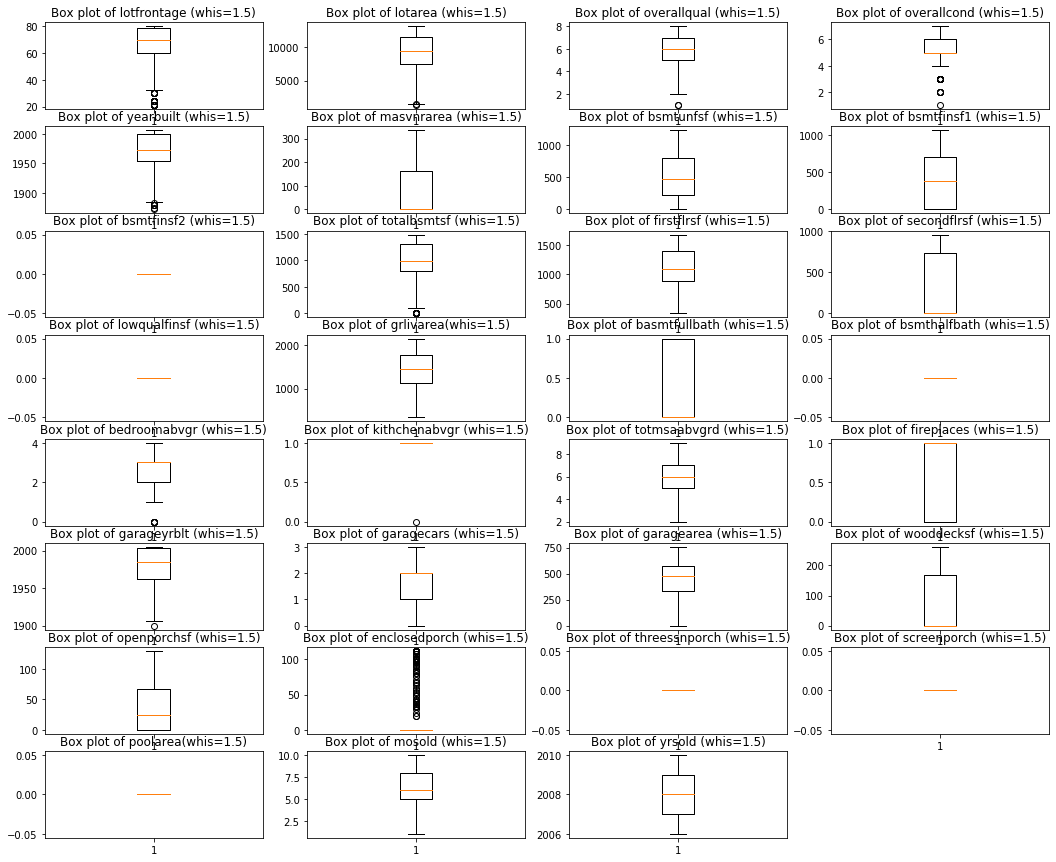

In [45]:
plt.figure(figsize=(18,15))


plt.subplot(8, 4, 1)
plt.boxplot(winsorized_lotfrongtage)
plt.title("Box plot of lotfrontage (whis=1.5)")

plt.subplot(8, 4, 2)
plt.boxplot(winsorized_lotarea)
plt.title("Box plot of lotarea (whis=1.5)")

plt.subplot(8, 4, 3)
plt.boxplot(winsorized_overallqual)
plt.title("Box plot of overallqual (whis=1.5)")

plt.subplot(8, 4, 4)
plt.boxplot(winsorized_overallcond)
plt.title("Box plot of overallcond (whis=1.5)")

plt.subplot(8, 4, 5)
plt.boxplot(winsorized_yearbuilt)
plt.title("Box plot of yearbuilt (whis=1.5)")

plt.subplot(8, 4, 6)
plt.boxplot(winsorized_masvnrarea)
plt.title("Box plot of masvnrarea (whis=1.5)")

plt.subplot(8, 4, 7)
plt.boxplot(winsorized_bsmtunfsf)
plt.title("Box plot of bsmtunfsf (whis=1.5)")

plt.subplot(8, 4, 8)
plt.boxplot(winsorized_bsmtfinsf1)
plt.title("Box plot of bsmtfinsf1 (whis=1.5)")

plt.subplot(8, 4, 9)
plt.boxplot(winsorized_bsmtfinsf2)
plt.title("Box plot of bsmtfinsf2 (whis=1.5)")

plt.subplot(8, 4, 10)
plt.boxplot(winsorized_totalbsmtsf)
plt.title("Box plot of totalbsmtsf (whis=1.5)")

plt.subplot(8, 4, 11)
plt.boxplot(winsorized_firstflrsf)
plt.title("Box plot of firstflrsf (whis=1.5)")

plt.subplot(8, 4, 12)
plt.boxplot(winsorized_secondflrsf)
plt.title("Box plot of secondflrsf (whis=1.5)")

plt.subplot(8, 4, 13)
plt.boxplot(winsorized_lowqualfinsf)
plt.title("Box plot of lowqualfinsf (whis=1.5)")

plt.subplot(8, 4, 14)
plt.boxplot(winsorized_grlivarea)
plt.title("Box plot of grlivarea(whis=1.5)")

plt.subplot(8, 4, 15)
plt.boxplot(winsorized_basmtfullbath)
plt.title("Box plot of basmtfullbath (whis=1.5)")

plt.subplot(8, 4, 16)
plt.boxplot(winsorized_bsmthalfbath)
plt.title("Box plot of bsmthalfbath (whis=1.5)")

plt.subplot(8, 4, 17)
plt.boxplot(winsorized_bedroomabvgr)
plt.title("Box plot of bedroomabvgr (whis=1.5)")

plt.subplot(8, 4, 18)
plt.boxplot(winsorized_kithchenabvgr)
plt.title("Box plot of kithchenabvgr (whis=1.5)")

plt.subplot(8, 4, 19)
plt.boxplot(winsorized_totmsaabvgrd)
plt.title("Box plot of totmsaabvgrd (whis=1.5)")

plt.subplot(8, 4, 20)
plt.boxplot(winsorized_fireplaces)
plt.title("Box plot of fireplaces (whis=1.5)")

plt.subplot(8, 4, 21)
plt.boxplot(winsorized_garageyrblt)
plt.title("Box plot of garageyrblt (whis=1.5)")

plt.subplot(8, 4, 22)
plt.boxplot(winsorized_garagecars)
plt.title("Box plot of garagecars (whis=1.5)")

plt.subplot(8, 4, 23)
plt.boxplot(winsorized_garagearea)
plt.title("Box plot of garagearea (whis=1.5)")

plt.subplot(8, 4, 24)
plt.boxplot(winsorized_wooddecksf)
plt.title("Box plot of wooddecksf (whis=1.5)")

plt.subplot(8, 4, 25)
plt.boxplot(winsorized_openporchsf)
plt.title("Box plot of openporchsf (whis=1.5)")

plt.subplot(8, 4, 26)
plt.boxplot(winsorized_enclosedporch)
plt.title("Box plot of enclosedporch (whis=1.5)")

plt.subplot(8, 4, 27)
plt.boxplot(winsorized_threessnporch)
plt.title("Box plot of threessnporch (whis=1.5)")

plt.subplot(8, 4, 28)
plt.boxplot(winsorized_screenporch)
plt.title("Box plot of screenporch (whis=1.5)")

plt.subplot(8, 4, 29)
plt.boxplot(winsorized_poolarea)
plt.title("Box plot of poolarea(whis=1.5)")

plt.subplot(8, 4, 30)
plt.boxplot(winsorized_mosold)
plt.title("Box plot of mosold (whis=1.5)")

plt.subplot(8, 4, 31)
plt.boxplot(winsorized_yrsold)
plt.title("Box plot of yrsold (whis=1.5)")


plt.show()

I will ignore the variables: enclosedporch, garageyrbuilt, yrbuilt, overallcond, lotfrontage, lotarea, and totalbsmtsf because they have ranges that have been winsorized and are still showing outliers which can signal an important factors to consider

In [46]:
house_df.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
lotarea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
bsmtfinsf1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [47]:
#split data

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

In [49]:
# Y is the target variable 
Y=house_df['saleprice']

#X is the feature set
X=house_df[['bedroomabvgr', 'fullbath', 'lotfrontage', 'overallqual', 'firstflrsf']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [50]:
X_train.head()

,bedroomabvgr,fullbath,lotfrontage,overallqual,firstflrsf
151,3,1,120.000000,5,969
262,3,2,69.000000,8,1482
1037,3,2,70.049958,8,1055
1183,2,1,60.000000,5,1130
933,3,2,63.000000,7,1500


In [51]:
X_train = sm.add_constant(X_train)

In [52]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     571.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          6.06e-310
Time:                        20:30:14   Log-Likelihood:                -14101.
No. Observations:                1168   AIC:                         2.821e+04
Df Residuals:                    1162   BIC:                         2.824e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.338e+05   7155.574    -18.705   

In [53]:
#R-squared is pretty good, standing at .71 and adjusted being also being at .71 

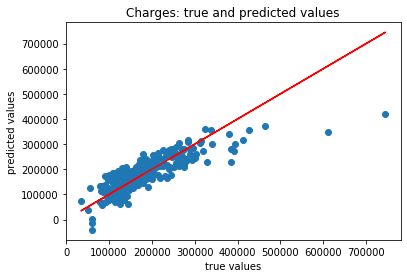

Mean absolute error of the prediction is: 31089.92151658728
Mean squared error of the prediction is: 2002319845.2647738
Root mean squared error of the prediction is: 44747.288691771864
Mean absolute percentage error of the prediction is: 19.16064180118958


In [54]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



In [55]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

ValueError: shapes (1168,6) and (5,) not aligned: 6 (dim 1) != 5 (dim 0)

In [57]:
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 1472.69195306 18109.73557288   246.68294536 33648.64188594
    51.13338295]

Intercept: 
 -133605.99683169645


In [58]:
#The scatter plot shows that the predicted values are not aligned with the
#true values, or the relationship is not linear. 
#My model is stable provided that the training and test r-squared values are very close

In [59]:
#Ridge

In [60]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7107565617827384
-----Test set statistics-----
R-squared of the model on the test set is: 0.7020143049560054
Mean absolute error of the prediction is: 31038.59131373257
Mean squared error of the prediction is: 2000587776.3223944
Root mean squared error of the prediction is: 44727.93060630454
Mean absolute percentage error of the prediction is: 19.119730422367862


In [61]:
#lasso - has feature selection (absolute value)

In [62]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7107719270711957
-----Test set statistics-----
R-squared of the model on the test set is: 0.7017778818560338
Mean absolute error of the prediction is: 31088.149331865417
Mean squared error of the prediction is: 2002175051.05306
Root mean squared error of the prediction is: 44745.670752074555
Mean absolute percentage error of the prediction is: 19.15907538807511


In [63]:
#Elasticnet

In [64]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.5038259026849923
-----Test set statistics-----
R-squared of the model on the test set is: 0.5505032530022587
Mean absolute error of the prediction is: 38130.17529059806
Mean squared error of the prediction is: 3017788143.848969
Root mean squared error of the prediction is: 54934.39854816806
Mean absolute percentage error of the prediction is: 22.561982126020936


In [65]:
# for corss validation use either for loop or gridsearch

In [66]:
house_df['yrsold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yrsold, dtype: float64

In [67]:
unemployment_df = pd.read_csv('index.csv')
unemployment_df.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [68]:
unemployment_df.columns

Index(['Year', 'Month', 'Day', 'Federal Funds Target Rate',
       'Federal Funds Upper Target', 'Federal Funds Lower Target',
       'Effective Federal Funds Rate', 'Real GDP (Percent Change)',
       'Unemployment Rate', 'Inflation Rate'],
      dtype='object')

In [69]:
unemployment_df['Unemployment Rate'].isna().sum()

152

In [70]:
unemployment_df.loc[unemployment_df['Year'].isin(['2006','2007','2008','2009','2010'])]

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
752,2006,1,1,4.25,NaN,NaN,4.29,4.9,4.7,2.1
753,2006,1,31,4.50,NaN,NaN,NaN,NaN,NaN,NaN
754,2006,2,1,4.50,NaN,NaN,4.49,NaN,4.8,2.1
755,2006,3,1,4.50,NaN,NaN,4.59,NaN,4.7,2.1
756,2006,3,28,4.75,NaN,NaN,NaN,NaN,NaN,NaN
757,2006,4,1,4.75,NaN,NaN,4.79,1.2,4.7,2.3
758,2006,5,1,4.75,NaN,NaN,4.94,NaN,4.6,2.4
759,2006,5,10,5.00,NaN,NaN,NaN,NaN,NaN,NaN
760,2006,6,1,5.00,NaN,NaN,4.99,NaN,4.6,2.6
761,2006,6,29,5.25,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
unemployment_df['Real GDP (Percent Change)'].fillna(unemployment_df['Real GDP (Percent Change)'].mean(), inplace=True)

In [72]:
unemployment_df['Real GDP (Percent Change)']

0       4.600
1       3.138
2       3.138
3       8.000
4       3.138
5       3.138
6      11.900
7       3.138
8       3.138
9       6.700
10      3.138
11      3.138
12      5.500
13      3.138
14      3.138
15      2.400
16      3.138
17      3.138
18     -1.500
19      3.138
20      3.138
21      3.400
22      3.138
23      3.138
24     -0.300
25      3.138
26      3.138
27      6.700
28      3.138
29      3.138
        ...  
874     2.000
875     3.138
876     3.138
877     2.600
878     3.138
879     3.138
880     2.000
881     3.138
882     3.138
883     0.900
884     3.138
885     3.138
886     3.138
887     0.800
888     3.138
889     3.138
890     1.400
891     3.138
892     3.138
893     3.500
894     3.138
895     3.138
896     1.900
897     3.138
898     3.138
899     3.138
900     3.138
901     3.138
902     3.138
903     3.138
Name: Real GDP (Percent Change), Length: 904, dtype: float64

In [73]:
house_df.shape

(1460, 77)

In [74]:
result = pd.concat([house_df,unemployment_df['Real GDP (Percent Change)']], ignore_index=False, axis=1)
result

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice,Real GDP (Percent Change)
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,4.600
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,3.138
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,3.138
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,8.000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,3.138
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,320,0,0,700,10,2009,WD,Normal,143000,3.138
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,307000,11.900
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,350,11,2009,WD,Normal,200000,3.138
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2008,WD,Abnorml,129900,3.138
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,1,2008,WD,Normal,118000,6.700


In [75]:
result.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', '

In [76]:
result.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,Real GDP (Percent Change)
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,904.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,3.138000
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,1.889643
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,-10.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,3.138000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,3.138000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,3.138000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,16.500000


In [77]:
#With Real GDP (Percent Change)

In [78]:
result['Real GDP (Percent Change)'].fillna(result['Real GDP (Percent Change)'].mean(), inplace=True)

In [79]:
# Y is the target variable 
Y=result['saleprice']

#X is the feature set
X=result[['bedroomabvgr', 'fullbath', 'lotfrontage', 'overallqual', 'firstflrsf', 'Real GDP (Percent Change)']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [93]:
from sklearn.model_selection import cross_val_score

cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')>

In [94]:
multireg = LinearRegression()

In [95]:
cross_val_score(multireg, X, Y, cv=10)

array([0.69327567, 0.75208465, 0.78709847, 0.69258016, 0.72208743,
       0.69301951, 0.68930681, 0.70000677, 0.5764671 , 0.74076717])

In [96]:
cross_val_score(multireg, X, Y, cv=10).mean()

0.704669375279934

From cross validation, we see that the average accuracy of the model is 70%

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [114]:
svm = SVC(kernel='sigmoid', C=5, gamma='auto')
svm.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[0.1, 0.5, 1, 5, 10]}

In [ ]:
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train,y_train)
print('score', clf.score(X_test,y_test))
print(clf.best_parama_)

In [80]:
X_train.head()

,bedroomabvgr,fullbath,lotfrontage,overallqual,firstflrsf,Real GDP (Percent Change)
151,3,1,120.000000,5,969,3.138
262,3,2,69.000000,8,1482,3.138
1037,3,2,70.049958,8,1055,3.138
1183,2,1,60.000000,5,1130,3.138
933,3,2,63.000000,7,1500,3.138


In [81]:
X_train = sm.add_constant(X_train)

In [82]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     476.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          8.19e-309
Time:                        20:30:19   Log-Likelihood:                -14100.
No. Observations:                1168   AIC:                         2.821e+04
Df Residuals:                    1161   BIC:                         2.825e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

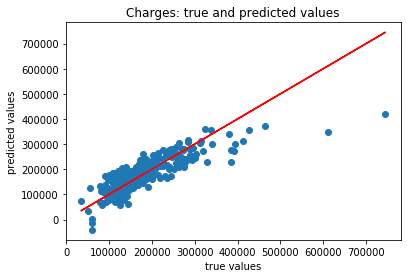

Mean absolute error of the prediction is: 31126.953476146213
Mean squared error of the prediction is: 2008949758.076424
Root mean squared error of the prediction is: 44821.30919636801
Mean absolute percentage error of the prediction is: 19.162843426431603


In [83]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



In [84]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 1482.35364853 18161.05692306   246.98000905 33654.55664455
    51.12765312  -481.07983955]

Intercept: 
 -132254.60799772313


In [86]:
#Ridge

In [87]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7110659120685272
-----Test set statistics-----
R-squared of the model on the test set is: 0.7010259712376752
Mean absolute error of the prediction is: 31079.993860347273
Mean squared error of the prediction is: 2007223156.4386334
Root mean squared error of the prediction is: 44802.044110047405
Mean absolute percentage error of the prediction is: 19.124879328646994


In [88]:
#lasso

In [89]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7110814055051059
-----Test set statistics-----
R-squared of the model on the test set is: 0.7007962649238939
Mean absolute error of the prediction is: 31125.031812653302
Mean squared error of the prediction is: 2008765336.6544557
Root mean squared error of the prediction is: 44819.25185290865
Mean absolute percentage error of the prediction is: 19.161280838829192


In [90]:
#Elasticnet

In [91]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.5039052597924308
-----Test set statistics-----
R-squared of the model on the test set is: 0.5499829913722916
Mean absolute error of the prediction is: 38145.759166694756
Mean squared error of the prediction is: 3021281026.476264
Root mean squared error of the prediction is: 54966.18075213398
Mean absolute percentage error of the prediction is: 22.55632914471585
